In [3]:
import numpy as np
from numpy import linalg as LA
import sympy
import math
from sympy.solvers import solve
from sympy import Symbol
from sympy import Eq
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import seaborn as sns
import pandas as pd



In [4]:


def calculate_dirty_price(bond, current_date, face_value=100):

    coupon_payment = (bond.coupon_rate / 100) * face_value

    # Calculate the last coupon date

    last_coupon_date = datetime.date(2024, 9, 1)
    days_since_last_coupon = (current_date - last_coupon_date).days

    # Accrued interest
    accrued_interest = coupon_payment * (days_since_last_coupon / 365)

    # Calculate dirty prices for all 10 clean prices
    dirty_prices = [
        clean_price + accrued_interest for clean_price in bond.prices
    ]
    return dirty_prices

def calculate_dirty_prices_for_all_bonds(bonds, start_date, face_value=100):
    # Generate the 10 dates
    dates = [start_date + datetime.timedelta(days=i) for i in range(10)]

    # Loop through each bond and calculate dirty prices
    for bond in bonds:
        print(f"Dirty Prices for {bond.ISIN}:")
        for i, date in enumerate(dates):
            dirty_prices = calculate_dirty_price(bond, date, face_value)
            print(f"Date: {date}, Dirty Price: {dirty_prices[i]:.2f}")




dates = [
    datetime.date(2025, 1, 6), datetime.date(2025, 1, 7), datetime.date(2025, 1, 8),
    datetime.date(2025, 1, 9), datetime.date(2025, 1, 10), datetime.date(2025, 1, 13),
    datetime.date(2025, 1, 14), datetime.date(2025, 1, 15), datetime.date(2025, 1, 16),
    datetime.date(2025, 1, 17)
]

class bond:
    def __init__(self, identifier, prices, maturity_date, coupon_rate, coupon_freq):
        self.identifier = identifier
        self.prices = prices
        self.maturity_date = maturity_date
        self.coupon_rate = coupon_rate
        self.coupon_freq = coupon_freq


bonds = [
    bond("CA135087K528", [99.73, 99.73, 99.74, 99.73, 99.74, 99.73, 99.73, 99.77, 99.78, 99.80],
         datetime.date(2025, 3, 1), 1.25, 0),
    bond("CA135087K940", [98.4, 98.41, 98.4, 98.42, 98.37, 98.36, 98.36, 98.40, 98.47, 98.5],
         datetime.date(2025, 9, 1), 0.50, 1),
    bond("CA135087L518", [96.99, 96.98, 96.97, 97.00, 96.90, 96.91, 96.80, 96.90, 97.01, 97.06],
         datetime.date(2026, 3, 1), 0.25, 2),
    bond("CA135087L930", [97.01, 96.99, 97.00, 97.03, 96.86, 96.77, 96.71, 96.85, 97.03, 97.07],
         datetime.date(2026, 9, 1), 1.00, 3),
    bond("CA135087F254", [96.62, 96.59, 96.58, 96.63, 96.39, 96.28, 96.19, 96.36, 96.6, 96.64],
         datetime.date(2027, 3, 1), 1.25, 4),
    bond("CA135087N837", [99.63, 99.56, 99.54, 99.58, 99.27, 99.13, 99.02, 99.20, 99.50, 99.53],
         datetime.date(2027, 9, 1), 2.75, 5),
    bond("CA135087P576", [101.82, 101.82, 101.70, 101.72, 101.52, 101.26, 101.02, 101.24, 101.58, 101.65],
         datetime.date(2028, 3, 1), 3.5, 6),
    bond("CA135087Q491", [101.1, 101.14, 100.99, 100.94, 100.79, 100.49, 100.19, 100.42, 100.92, 101.02],
         datetime.date(2028, 9, 1), 3.25, 7),
    bond("CA135087Q988", [104.07, 104.01, 103.90, 103.87, 103.53, 103.29, 102.99, 103.24, 103.80, 103.90],
         datetime.date(2029, 3, 1), 4.00, 8),
    bond("CA135087R895", [102.22, 102.14, 102.04, 101.98, 101.59, 101.28, 101.00, 101.27, 101.85, 101.97],
         datetime.date(2029, 9, 1), 3.50, 9),
    bond("CA135087S471", [98.81, 98.60, 98.53, 98.54, 97.96, 97.61, 97.38, 97.76, 98.40, 98.47],
         datetime.date(2030, 3, 1), 2.75, 10)
]

for bond in bonds:
    print(f"Dirty Prices for {bond.identifier}:")
    for i, date in enumerate(dates):
        dirty_prices = calculate_dirty_price(bond, date)
        print(f"{dirty_prices[i]:.2f}")



Dirty Prices for CA135087K528:
100.16
100.17
100.18
100.18
100.19
100.19
100.19
100.24
100.25
100.27
Dirty Prices for CA135087K940:
98.57
98.59
98.58
98.60
98.55
98.54
98.54
98.59
98.66
98.69
Dirty Prices for CA135087L518:
97.08
97.07
97.06
97.09
96.99
97.00
96.89
96.99
97.10
97.15
Dirty Prices for CA135087L930:
97.36
97.34
97.35
97.39
97.22
97.14
97.08
97.22
97.41
97.45
Dirty Prices for CA135087F254:
97.05
97.03
97.02
97.08
96.84
96.74
96.65
96.83
97.07
97.11
Dirty Prices for CA135087N837:
100.59
100.52
100.51
100.56
100.26
100.14
100.04
100.22
100.53
100.57
Dirty Prices for CA135087P576:
103.04
103.05
102.94
102.97
102.78
102.54
102.31
102.54
102.89
102.97
Dirty Prices for CA135087Q491:
102.23
102.28
102.14
102.10
101.96
101.68
101.39
101.63
102.14
102.25
Dirty Prices for CA135087Q988:
105.46
105.41
105.31
105.29
104.97
104.76
104.47
104.73
105.30
105.41
Dirty Prices for CA135087R895:
103.44
103.37
103.28
103.23
102.85
102.56
102.29
102.57
103.16
103.29
Dirty Prices for CA135087S471:

In [3]:
class bond:
    def __init__(self, identifier, prices, maturity_date, coupon_rate, coupon_freq):
        self.identifier = identifier
        self.prices = prices
        self.maturity_date = maturity_date
        self.coupon_rate = coupon_rate
        self.coupon_freq = coupon_freq

bonds = [
    bond("CA135087K528", [100.16, 100.17, 100.18, 100.18, 100.19, 100.19, 100.19, 100.24, 100.25, 100.27],
         datetime.date(2025, 3, 1), 1.25, 0),
    bond("CA135087K940", [98.57, 98.59, 98.58, 98.60, 98.55, 98.54, 98.54, 98.59, 98.66, 98.69],
         datetime.date(2025, 9, 1), 0.50, 1),
    bond("CA135087L518", [97.08, 97.07, 97.06, 97.09, 96.99, 97.00, 96.89, 96.99, 97.10, 97.15],
         datetime.date(2026, 3, 1), 0.25, 2),
    bond("CA135087L930", [97.36, 97.34, 97.35, 97.39, 97.22, 97.14, 97.08, 97.22, 97.41, 97.45],
         datetime.date(2026, 9, 1), 1.00, 3),
    bond("CA135087F254", [97.05, 97.03, 97.02, 97.08, 96.84, 96.74, 96.65, 96.83, 97.07, 97.11],
         datetime.date(2027, 3, 1), 1.25, 4),
    bond("CA135087N837", [100.59, 100.52, 100.51, 100.56, 100.26, 100.14, 100.04, 100.22, 100.53, 100.57],
         datetime.date(2027, 9, 1), 2.75, 5),
    bond("CA135087P576", [103.04, 103.05, 102.94, 102.97, 102.78, 102.54, 102.31, 102.54, 102.89, 102.97],
         datetime.date(2028, 3, 1), 3.5, 6),
    bond("CA135087Q491", [102.23, 102.28, 102.14, 102.10, 101.96, 101.68, 101.39, 101.63, 102.14, 102.25],
         datetime.date(2028, 9, 1), 3.25, 7),
    bond("CA135087Q988", [105.46, 105.41, 105.31, 105.29, 104.97, 104.76, 104.47, 104.73, 105.30, 105.41],
         datetime.date(2029, 3, 1), 4.00, 8),
    bond("CA135087R895", [103.44, 103.37, 103.28, 103.23, 102.85, 102.56, 102.29, 102.57, 103.16, 103.29],
         datetime.date(2029, 9, 1), 3.50, 9),
    bond("CA135087S471", [99.77, 99.56, 99.50, 99.52, 98.95, 98.62, 98.40, 98.78, 99.43, 99.51],
         datetime.date(2030, 3, 1), 2.75, 10)
]


Day 1,  2025-03-01: 3.13%
Day 1,  2025-09-01: 2.98%
Day 1,  2026-03-01: 2.91%
Day 1,  2026-09-01: 2.84%
Day 1,  2027-03-01: 2.87%
Day 1,  2027-09-01: 2.87%
Day 1,  2028-03-01: 2.87%
Day 1,  2028-09-01: 2.91%
Day 1,  2029-03-01: 2.93%
Day 1,  2029-09-01: 2.97%
Day 1,  2030-03-01: 2.98%
Day 2,  2025-03-01: 3.12%
Day 2,  2025-09-01: 2.96%
Day 2,  2026-03-01: 2.93%
Day 2,  2026-09-01: 2.86%
Day 2,  2027-03-01: 2.88%
Day 2,  2027-09-01: 2.90%
Day 2,  2028-03-01: 2.87%
Day 2,  2028-09-01: 2.89%
Day 2,  2029-03-01: 2.95%
Day 2,  2029-09-01: 2.98%
Day 2,  2030-03-01: 3.03%
Day 3,  2025-03-01: 3.11%
Day 3,  2025-09-01: 2.99%
Day 3,  2026-03-01: 2.94%
Day 3,  2026-09-01: 2.86%
Day 3,  2027-03-01: 2.89%
Day 3,  2027-09-01: 2.91%
Day 3,  2028-03-01: 2.91%
Day 3,  2028-09-01: 2.94%
Day 3,  2029-03-01: 2.98%
Day 3,  2029-09-01: 3.01%
Day 3,  2030-03-01: 3.04%
Day 4,  2025-03-01: 3.17%
Day 4,  2025-09-01: 2.97%
Day 4,  2026-03-01: 2.92%
Day 4,  2026-09-01: 2.84%
Day 4,  2027-03-01: 2.86%
Day 4,  2027

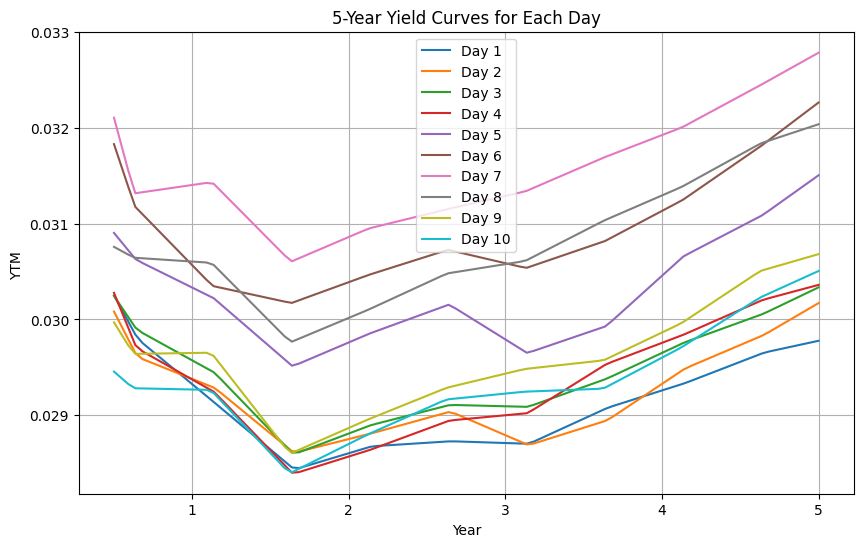

In [7]:
dates = [
    datetime.date(2025, 1, 6), datetime.date(2025, 1, 7), datetime.date(2025, 1, 8),
    datetime.date(2025, 1, 9), datetime.date(2025, 1, 10), datetime.date(2025, 1, 13),
    datetime.date(2025, 1, 14), datetime.date(2025, 1, 15), datetime.date(2025, 1, 16),
    datetime.date(2025, 1, 17)
]

def calculate_spot_rates(bonds, day_index):
    spot_rates = []
    for i, bond in enumerate(bonds):
        # Calculate time to maturity in years
        time_to_maturity = (bond.maturity_date - dates[day_index]).days / 365.0
        price = bond.prices[day_index]
        coupon = bond.coupon_rate / 2  # Semiannual coupon
        face_value = 100  # Assuming face value is 100

        if i == 0:
            # For the first bond, calculate the spot rate directly
            spot_rate = -np.log(price / (face_value + coupon)) / time_to_maturity


        else:
            # Calculate the present value of coupons using earlier spot rates
            pv_coupons = coupon * np.exp(-spot_rates[0] * (bonds[0].maturity_date - dates[day_index]).days / 365)
            pv_coupons = pv_coupons + sum(
                (coupon * np.exp(-spot_rates[j] * (bonds[j].maturity_date - dates[day_index]).days / 365))
                for j in range(1, i)
            )
            # Calculate the spot rate for the current bond
            spot_rate = -np.log((price - pv_coupons) / (face_value + coupon)) / time_to_maturity



        spot_rates.append(spot_rate)
        print(f"Day {day_index+1},  {bond.maturity_date}: {spot_rate * 100:.2f}%")
    return spot_rates


# Compute spot rates for each day
spot_rates_by_day = [calculate_spot_rates(bonds, day_index) for day_index in range(len(dates))]


# Interpolation and plotting
plt.figure(figsize=(10, 6))
for day_index, spot_rates in enumerate(spot_rates_by_day):
    maturities = [(bond.maturity_date - dates[day_index]).days / 365.0 for bond in bonds]
    interpolated_curve = np.interp(np.linspace(0.5, 5, 100), maturities, spot_rates)  # Interpolated curve
    plt.plot(np.linspace(0.5, 5, 100), interpolated_curve, label=f"Day {day_index + 1}")

# Add labels, title, and legend
plt.title("5-Year Yield Curves for Each Day")
plt.xlabel("Year")
plt.ylabel("YTM ")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Day 1,  2025-03-01: 3.13%
Day 1,  2025-09-01: 2.98%
Day 1,  2026-03-01: 2.91%
Day 1,  2026-09-01: 2.84%
Day 1,  2027-03-01: 2.87%
Day 1,  2027-09-01: 2.87%
Day 1,  2028-03-01: 2.87%
Day 1,  2028-09-01: 2.91%
Day 1,  2029-03-01: 2.93%
Day 1,  2029-09-01: 2.97%
Day 1,  2030-03-01: 2.98%
Day 2,  2025-03-01: 3.12%
Day 2,  2025-09-01: 2.96%
Day 2,  2026-03-01: 2.93%
Day 2,  2026-09-01: 2.86%
Day 2,  2027-03-01: 2.88%
Day 2,  2027-09-01: 2.90%
Day 2,  2028-03-01: 2.87%
Day 2,  2028-09-01: 2.89%
Day 2,  2029-03-01: 2.95%
Day 2,  2029-09-01: 2.98%
Day 2,  2030-03-01: 3.03%
Day 3,  2025-03-01: 3.11%
Day 3,  2025-09-01: 2.99%
Day 3,  2026-03-01: 2.94%
Day 3,  2026-09-01: 2.86%
Day 3,  2027-03-01: 2.89%
Day 3,  2027-09-01: 2.91%
Day 3,  2028-03-01: 2.91%
Day 3,  2028-09-01: 2.94%
Day 3,  2029-03-01: 2.98%
Day 3,  2029-09-01: 3.01%
Day 3,  2030-03-01: 3.04%
Day 4,  2025-03-01: 3.17%
Day 4,  2025-09-01: 2.97%
Day 4,  2026-03-01: 2.92%
Day 4,  2026-09-01: 2.84%
Day 4,  2027-03-01: 2.86%
Day 4,  2027

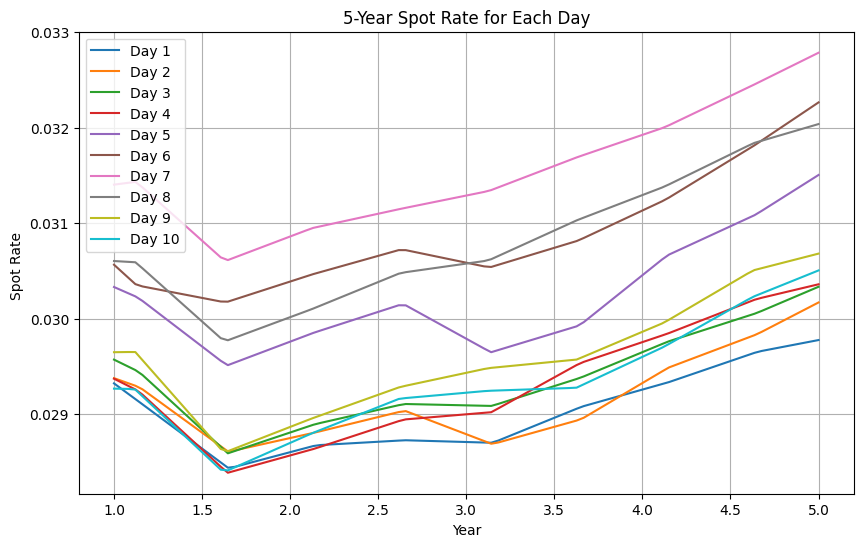

In [8]:
dates = [
    datetime.date(2025, 1, 6), datetime.date(2025, 1, 7), datetime.date(2025, 1, 8),
    datetime.date(2025, 1, 9), datetime.date(2025, 1, 10), datetime.date(2025, 1, 13),
    datetime.date(2025, 1, 14), datetime.date(2025, 1, 15), datetime.date(2025, 1, 16),
    datetime.date(2025, 1, 17)
]

def calculate_spot_rates(bonds, day_index):
    spot_rates = []
    for i, bond in enumerate(bonds):
        # Calculate time to maturity in years
        time_to_maturity = (bond.maturity_date - dates[day_index]).days / 365.0
        price = bond.prices[day_index]
        coupon = bond.coupon_rate / 2  # Semiannual coupon
        face_value = 100  # Assuming face value is 100

        if i == 0:
            # For the first bond, calculate the spot rate directly
            spot_rate = -np.log(price / (face_value + coupon)) / time_to_maturity


        else:
            # Calculate the present value of coupons using earlier spot rates
            pv_coupons = coupon * np.exp(-spot_rates[0] * (bonds[0].maturity_date - dates[day_index]).days / 365)
            pv_coupons = pv_coupons + sum(
                (coupon * np.exp(-spot_rates[j] * (bonds[j].maturity_date - dates[day_index]).days / 365))
                for j in range(1, i)
            )
            # Calculate the spot rate for the current bond
            spot_rate = -np.log((price - pv_coupons) / (face_value + coupon)) / time_to_maturity



        spot_rates.append(spot_rate)
        print(f"Day {day_index+1},  {bond.maturity_date}: {spot_rate * 100:.2f}%")
    return spot_rates


# Compute spot rates for each day
spot_rates_by_day = [calculate_spot_rates(bonds, day_index) for day_index in range(len(dates))]


# Interpolation and plotting
plt.figure(figsize=(10, 6))
for day_index, spot_rates in enumerate(spot_rates_by_day):
    maturities = [(bond.maturity_date - dates[day_index]).days / 365.0 for bond in bonds]
    interpolated_curve = np.interp(np.linspace(1, 5, 100), maturities, spot_rates)  # Interpolated curve
    plt.plot(np.linspace(1, 5, 100), interpolated_curve, label=f"Day {day_index + 1}")

# Add labels, title, and legend
plt.title("5-Year Spot Rate for Each Day")
plt.xlabel("Year")
plt.ylabel("Spot Rate ")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [12]:


import datetime
import numpy as np
from scipy.interpolate import interp1d

# Input data (dates and spot rates for 10 different days)
dates = [
    datetime.date(2025, 1, 6), datetime.date(2025, 1, 7), datetime.date(2025, 1, 8),
    datetime.date(2025, 1, 9), datetime.date(2025, 1, 10), datetime.date(2025, 1, 13),
    datetime.date(2025, 1, 14), datetime.date(2025, 1, 15), datetime.date(2025, 1, 16),
    datetime.date(2025, 1, 17)
]

# Spot rates for each day (corresponding to specific maturities)
spot_rate_data = {
    datetime.date(2025, 1, 6): {
        datetime.date(2025, 9, 1): 2.98,
        datetime.date(2026, 3, 1): 2.91,
        datetime.date(2026, 9, 1): 2.84,
        datetime.date(2027, 3, 1): 2.87,
        datetime.date(2027, 9, 1): 2.87,
        datetime.date(2028, 3, 1): 2.87,
        datetime.date(2028, 9, 1): 2.91,
        datetime.date(2029, 3, 1): 2.93,
        datetime.date(2029, 9, 1): 2.97,
        datetime.date(2030, 3, 1): 2.98
    },
    datetime.date(2025, 1, 7): {
        datetime.date(2025, 9, 1): 2.96,
        datetime.date(2026, 3, 1): 2.93,
        datetime.date(2026, 9, 1): 2.86,
        datetime.date(2027, 3, 1): 2.88,
        datetime.date(2027, 9, 1): 2.90,
        datetime.date(2028, 3, 1): 2.87,
        datetime.date(2028, 9, 1): 2.89,
        datetime.date(2029, 3, 1): 2.95,
        datetime.date(2029, 9, 1): 2.98,
        datetime.date(2030, 3, 1): 3.03
    },
    datetime.date(2025, 1, 8): {
        datetime.date(2025, 9, 1): 2.99,
        datetime.date(2026, 3, 1): 2.94,
        datetime.date(2026, 9, 1): 2.86,
        datetime.date(2027, 3, 1): 2.89,
        datetime.date(2027, 9, 1): 2.91,
        datetime.date(2028, 3, 1): 2.91,
        datetime.date(2028, 9, 1): 2.94,
        datetime.date(2029, 3, 1): 2.98,
        datetime.date(2029, 9, 1): 3.01,
        datetime.date(2030, 3, 1): 3.04
    },
    datetime.date(2025, 1, 9): {
        datetime.date(2025, 9, 1): 2.97,
        datetime.date(2026, 3, 1): 2.92,
        datetime.date(2026, 9, 1): 2.84,
        datetime.date(2027, 3, 1): 2.86,
        datetime.date(2027, 9, 1): 2.89,
        datetime.date(2028, 3, 1): 2.90,
        datetime.date(2028, 9, 1): 2.95,
        datetime.date(2029, 3, 1): 2.98,
        datetime.date(2029, 9, 1): 3.02,
        datetime.date(2030, 3, 1): 3.04
    },
    datetime.date(2025, 1, 10): {
        datetime.date(2025, 9, 1): 3.06,
        datetime.date(2026, 3, 1): 3.02,
        datetime.date(2026, 9, 1): 2.95,
        datetime.date(2027, 3, 1): 2.99,
        datetime.date(2027, 9, 1): 3.02,
        datetime.date(2028, 3, 1): 2.96,
        datetime.date(2028, 9, 1): 2.99,
        datetime.date(2029, 3, 1): 3.07,
        datetime.date(2029, 9, 1): 3.11,
        datetime.date(2030, 3, 1): 3.17
    },
    datetime.date(2025, 1, 13): {
        datetime.date(2025, 9, 1): 3.12,
        datetime.date(2026, 3, 1): 3.04,
        datetime.date(2026, 9, 1): 3.02,
        datetime.date(2027, 3, 1): 3.05,
        datetime.date(2027, 9, 1): 3.07,
        datetime.date(2028, 3, 1): 3.05,
        datetime.date(2028, 9, 1): 3.08,
        datetime.date(2029, 3, 1): 3.12,
        datetime.date(2029, 9, 1): 3.18,
        datetime.date(2030, 3, 1): 3.24
    },
    datetime.date(2025, 1, 14): {
        datetime.date(2025, 9, 1): 3.13,
        datetime.date(2026, 3, 1): 3.14,
        datetime.date(2026, 9, 1): 3.06,
        datetime.date(2027, 3, 1): 3.09,
        datetime.date(2027, 9, 1): 3.12,
        datetime.date(2028, 3, 1): 3.13,
        datetime.date(2028, 9, 1): 3.17,
        datetime.date(2029, 3, 1): 3.20,
        datetime.date(2029, 9, 1): 3.25,
        datetime.date(2030, 3, 1): 3.29
    },
    datetime.date(2025, 1, 15): {
        datetime.date(2025, 9, 1): 3.06,
        datetime.date(2026, 3, 1): 3.06,
        datetime.date(2026, 9, 1): 2.98,
        datetime.date(2027, 3, 1): 3.01,
        datetime.date(2027, 9, 1): 3.05,
        datetime.date(2028, 3, 1): 3.06,
        datetime.date(2028, 9, 1): 3.10,
        datetime.date(2029, 3, 1): 3.14,
        datetime.date(2029, 9, 1): 3.18,
        datetime.date(2030, 3, 1): 3.21
    },
    datetime.date(2025, 1, 16): {
        datetime.date(2025, 9, 1): 2.96,
        datetime.date(2026, 3, 1): 2.97,
        datetime.date(2026, 9, 1): 2.86,
        datetime.date(2027, 3, 1): 2.90,
        datetime.date(2027, 9, 1): 2.93,
        datetime.date(2028, 3, 1): 2.95,
        datetime.date(2028, 9, 1): 2.96,
        datetime.date(2029, 3, 1): 3.00,
        datetime.date(2029, 9, 1): 3.05,
        datetime.date(2030, 3, 1): 3.07
    },
    datetime.date(2025, 1, 17): {
        datetime.date(2025, 9, 1): 2.93,
        datetime.date(2026, 3, 1): 2.93,
        datetime.date(2026, 9, 1): 2.84,
        datetime.date(2027, 3, 1): 2.88,
        datetime.date(2027, 9, 1): 2.92,
        datetime.date(2028, 3, 1): 2.92,
        datetime.date(2028, 9, 1): 2.93,
        datetime.date(2029, 3, 1): 2.97,
        datetime.date(2029, 9, 1): 3.02,
        datetime.date(2030, 3, 1): 3.06
    }
}

def compute_interpolated_spot_rates(base_date, spot_rate_maturities, years_to_interpolate):
    """
    Compute interpolated spot rates for specific years based on the spot rate maturities.

    Args:
    - base_date (datetime.date): The base date for interpolation.
    - spot_rate_maturities (dict): Dictionary where keys are maturity dates (datetime.date) and values are spot rates.
    - years_to_interpolate (list of float): The list of years to interpolate spot rates for.

    Returns:
    - dict: Interpolated spot rates for the given years.
    """
    # Convert maturities to fractional years from base_date
    times = [(maturity - base_date).days / 365.0 for maturity in spot_rate_maturities.keys()]
    rates = [rate / 100.0 for rate in spot_rate_maturities.values()]  # Convert to decimal

    # Perform linear interpolation
    interpolated_rates = {}
    for year in years_to_interpolate:
        interpolated_rates[year] = np.interp(year, times, rates) * 100  # Convert back to percentage

    return interpolated_rates

years_to_interpolate = [1, 2, 3, 4, 5]  # Years for interpolation
all_interpolated_rates = {}

for base_date, spot_rates in spot_rate_data.items():
    interpolated_rates = compute_interpolated_spot_rates(base_date, spot_rates, years_to_interpolate)
    all_interpolated_rates[base_date] = interpolated_rates

print(all_interpolated_rates)

{datetime.date(2025, 1, 6): {1: 2.9308839779005527, 2: 2.861049723756906, 3: 2.87, 4: 2.923922651933702, 5: 2.976961325966851}, datetime.date(2025, 1, 7): {1: 2.938784530386741, 2: 2.87414364640884, 3: 2.878901098901099, 4: 2.9320994475138122, 5: 3.0150828729281764}, datetime.date(2025, 1, 8): {1: 2.954364640883978, 2: 2.8813812154696135, 3: 2.91, 4: 2.9682872928176796, 5: 3.03121546961326}, datetime.date(2025, 1, 9): {1: 2.9340883977900556, 2: 2.8543646408839782, 3: 2.8971428571428572, 4: 2.9713812154696133, 5: 3.0342541436464088}, datetime.date(2025, 1, 10): {1: 3.0310497237569063, 2: 2.978950276243094, 3: 2.9768131868131866, 4: 3.0474585635359115, 5: 3.1530939226519337}, datetime.date(2025, 1, 13): {1: 3.0607734806629834, 2: 3.0422099447513813, 3: 3.055274725274725, 4: 3.1093922651933705, 5: 3.2240883977900556}, datetime.date(2025, 1, 14): {1: 3.1374585635359122, 2: 3.0823756906077344, 3: 3.1274175824175825, 4: 3.192209944751381, 5: 3.2796132596685084}, datetime.date(2025, 1, 15): {

Forward rates for Day 1: [2.791000000000001, 2.8394999999999997, 2.9216666666666664, 2.9884999999999993]
Forward rates for Day 2: [2.809, 2.849, 2.9296666666666664, 3.034]
Forward rates for Day 3: [2.808, 2.8880000000000003, 2.9726666666666666, 3.0502499999999997]
Forward rates for Day 4: [2.7739999999999996, 2.8785, 2.9833333333333334, 3.0589999999999997]
Forward rates for Day 5: [2.927, 2.9499999999999997, 3.0523333333333333, 3.1835000000000004]
Forward rates for Day 6: [3.023, 3.0520000000000005, 3.125, 3.2647500000000003]
Forward rates for Day 7: [3.0269999999999997, 3.1220000000000003, 3.2103333333333337, 3.315749999999999]
Forward rates for Day 8: [2.946, 3.0555, 3.1533333333333338, 3.2375000000000003]
Forward rates for Day 9: [2.8120000000000007, 2.933499999999999, 2.9973333333333336, 3.08925]
Forward rates for Day 10: [2.8099999999999996, 2.9149999999999996, 2.97, 3.0799999999999996]


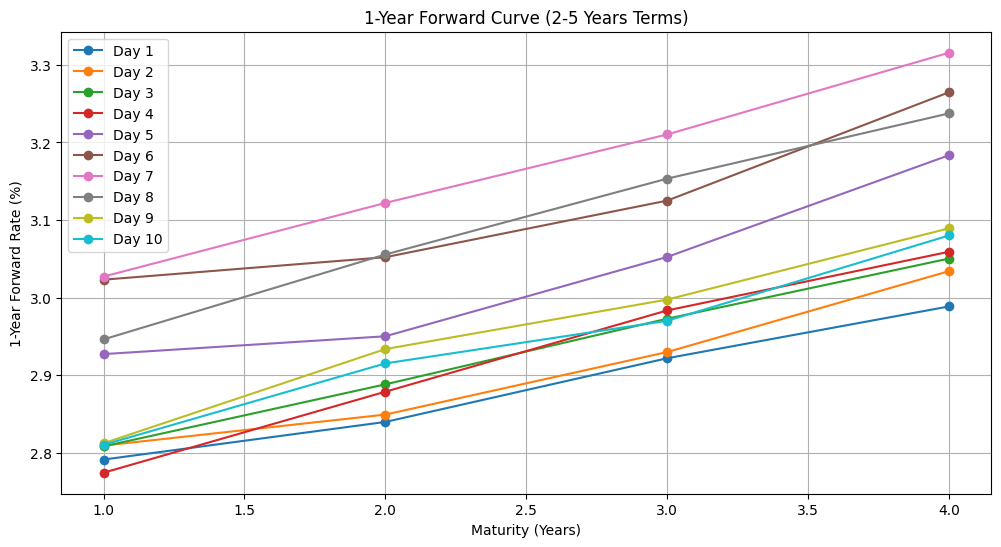

In [8]:

spot_rate_data = [
    [2.931, 2.861, 2.87, 2.924, 2.977],  # Day 1
    [2.939, 2.874, 2.879, 2.932, 3.015],  # Day 2
    [2.954, 2.881, 2.91, 2.968, 3.031],  # Day 3
    [2.934, 2.854, 2.897, 2.971, 3.034],  # Day 4
    [3.031, 2.979, 2.977, 3.047, 3.153],  # Day 5
    [3.061, 3.042, 3.055, 3.109, 3.224],  # Day 6
    [3.137, 3.082, 3.127, 3.192, 3.28],  # Day 7
    [3.06, 3.003, 3.057, 3.13, 3.202],  # Day 8
    [2.968, 2.89, 2.945, 2.99, 3.065],  # Day 9
    [2.93, 2.87, 2.92, 2.96, 3.05],  # Day 10
]
# Maturities in years (assumed we start at 1 year)
maturities = [1, 2, 3, 4, 5]

def calculate_1_year_forward_curve(spot_rate_list, maturities):
    forward_curves = []
    for daily_spot_rates in spot_rate_list:
        daily_forward_rates = []
        r1 = daily_spot_rates[0] / 100  # Spot rate for 1 year (T1 = 1)
        for i in range(1, len(maturities)):
            Ti = maturities[i]  # Current maturity
            ri = daily_spot_rates[i] / 100  # Spot rate for Ti

            # Calculate the 1-year forward rate using the formula
            forward_rate = (ri * Ti - r1 * 1) / (Ti - 1)
            daily_forward_rates.append(forward_rate * 100)  # Convert back to percentage
        forward_curves.append(daily_forward_rates)
        print(f"Forward rates for Day {spot_rate_list.index(daily_spot_rates) + 1}: {daily_forward_rates}")


    return forward_curves

# Calculate the 1-year forward curves
one_year_forward_curves = calculate_1_year_forward_curve(spot_rate_data, maturities)

# Plot the forward curves
plt.figure(figsize=(12, 6))
for i, forward_rates in enumerate(one_year_forward_curves):
    plt.plot(maturities[:4], forward_rates, label=f"Day {i + 1}", marker="o")

# Customize the plot
plt.title("1-Year Forward Curve (2-5 Years Terms)")
plt.xlabel("Maturity (Years)")
plt.ylabel("1-Year Forward Rate (%)")
plt.legend()
plt.grid()
plt.show()



Forward rates for Day 1: [2.791000000000001, 2.8394999999999997, 2.9216666666666664, 2.9884999999999993]
Forward rates for Day 2: [2.809, 2.849, 2.9296666666666664, 3.034]
Forward rates for Day 3: [2.808, 2.8880000000000003, 2.9726666666666666, 3.0502499999999997]
Forward rates for Day 4: [2.7739999999999996, 2.8785, 2.9833333333333334, 3.0589999999999997]
Forward rates for Day 5: [2.927, 2.9499999999999997, 3.0523333333333333, 3.1835000000000004]
Forward rates for Day 6: [3.023, 3.0520000000000005, 3.125, 3.2647500000000003]
Forward rates for Day 7: [3.0269999999999997, 3.1220000000000003, 3.2103333333333337, 3.315749999999999]
Forward rates for Day 8: [2.946, 3.0555, 3.1533333333333338, 3.2375000000000003]
Forward rates for Day 9: [2.8120000000000007, 2.933499999999999, 2.9973333333333336, 3.08925]
Forward rates for Day 10: [2.8099999999999996, 2.9149999999999996, 2.97, 3.0799999999999996]


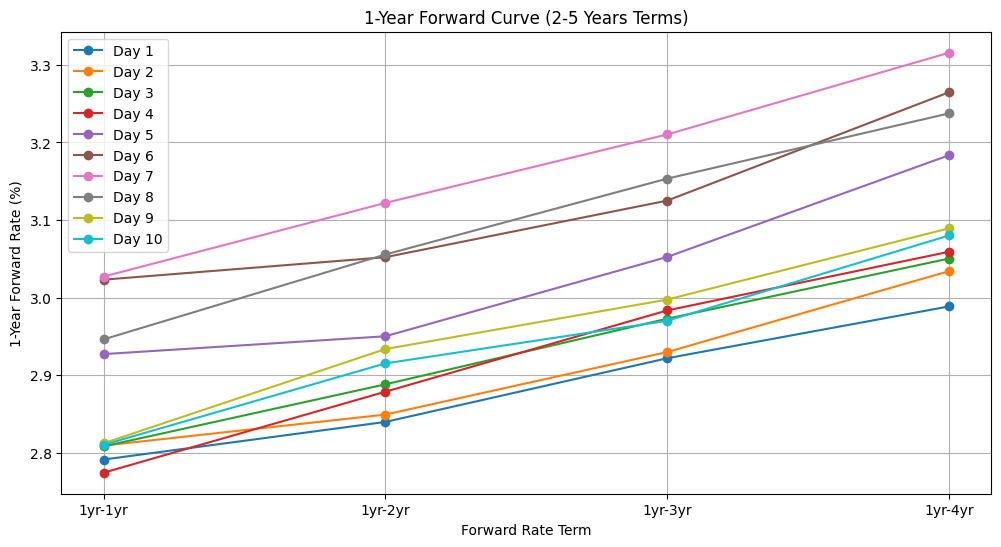

In [18]:
import matplotlib.pyplot as plt
spot_rate_data = [
    [2.931, 2.861, 2.87, 2.924, 2.977],  # Day 1
    [2.939, 2.874, 2.879, 2.932, 3.015],  # Day 2
    [2.954, 2.881, 2.91, 2.968, 3.031],  # Day 3
    [2.934, 2.854, 2.897, 2.971, 3.034],  # Day 4
    [3.031, 2.979, 2.977, 3.047, 3.153],  # Day 5
    [3.061, 3.042, 3.055, 3.109, 3.224],  # Day 6
    [3.137, 3.082, 3.127, 3.192, 3.28],  # Day 7
    [3.06, 3.003, 3.057, 3.13, 3.202],  # Day 8
    [2.968, 2.89, 2.945, 2.99, 3.065],  # Day 9
    [2.93, 2.87, 2.92, 2.96, 3.05],  # Day 10
]
# Maturities in years (assumed we start at 1 year)
maturities = [1, 2, 3, 4, 5]

def calculate_1_year_forward_curve(spot_rate_list, maturities):
    forward_curves = []
    for daily_spot_rates in spot_rate_list:
        daily_forward_rates = []
        r1 = daily_spot_rates[0] / 100  # Spot rate for 1 year (T1 = 1)
        for i in range(1, len(maturities)):
            Ti = maturities[i]  # Current maturity
            ri = daily_spot_rates[i] / 100  # Spot rate for Ti

            # Calculate the 1-year forward rate using the formula
            forward_rate = (ri * Ti - r1 * 1) / (Ti - 1)
            daily_forward_rates.append(forward_rate * 100)  # Convert back to percentage
        forward_curves.append(daily_forward_rates)
        print(f"Forward rates for Day {spot_rate_list.index(daily_spot_rates) + 1}: {daily_forward_rates}")


    return forward_curves

# Calculate the 1-year forward curves
one_year_forward_curves = calculate_1_year_forward_curve(spot_rate_data, maturities)

x_labels = [f"{1}yr-{i}yr" for i in range(1, len(maturities) )]
selected_maturities = maturities[:4]
# Plot the forward curves
plt.figure(figsize=(12, 6))
for i, forward_rates in enumerate(one_year_forward_curves):
    plt.plot(maturities[:4], forward_rates, label=f"Day {i + 1}", marker="o")

# Customize the plot
plt.title("1-Year Forward Curve (2-5 Years Terms)")
plt.xlabel("Forward Rate Term")
plt.ylabel("1-Year Forward Rate (%)")
plt.xticks(selected_maturities, x_labels)
plt.legend()
plt.grid()
plt.show()


In [4]:

r_yields = np.array([
    [2.931, 2.939, 2.954, 2.934, 3.031, 3.061, 3.137, 3.06,  2.968, 2.93 ],
    [2.861, 2.874, 2.881, 2.854, 2.979, 3.042, 3.082, 3.003, 2.89,  2.87 ],
    [2.87,  2.879, 2.91,  2.897, 2.977, 3.055, 3.127, 3.057, 2.945, 2.92 ],
    [2.924, 2.932, 2.968, 2.971, 3.047, 3.109, 3.192, 3.13,  2.99,  2.96 ],
    [2.977, 3.015, 3.031, 3.034, 3.153, 3.224, 3.28,  3.202, 3.065, 3.05 ],
 ])

r_forwards = np.array([
    [2.791, 2.809, 2.808, 2.774, 2.927, 3.023, 3.027, 2.946, 2.812, 2.81],
    [2.8395, 2.849, 2.888, 2.8785, 2.95, 3.052, 3.122, 3.0555, 2.9335, 2.915],
    [2.9216666666666664, 2.9296666666666664, 2.9726666666666666, 2.9833333333333334, 3.0523333333333333, 3.125, 3.2103333333333337, 3.1533333333333338, 2.9973333333333336, 2.97],
    [2.9885, 3.034, 3.05025, 3.059, 3.1835, 3.26475, 3.31575, 3.2375, 3.08925, 3.08],
])


# Calculate Log-Returns
log_returns_yields = np.log(r_yields[:, 1:] / r_yields[:, :-1])
log_returns_forwards = np.log(r_forwards[:, 1:] / r_forwards[:, :-1])

cov_matrix_yields = np.cov(log_returns_yields, rowvar=True)  # Variables are rows
cov_matrix_forwards = np.cov(log_returns_forwards, rowvar=True)


print("Variance-Covariance Matrix (Yields):")
print(cov_matrix_yields)

print("\nVariance-Covariance Matrix (Forwards):")
print(cov_matrix_forwards)

Variance-Covariance Matrix (Yields):
[[0.00044393 0.00048941 0.00045226 0.00046795 0.00049312]
 [0.00048941 0.00059422 0.00052104 0.00052641 0.00059113]
 [0.00045226 0.00052104 0.00050543 0.00052151 0.00053618]
 [0.00046795 0.00052641 0.00052151 0.00055738 0.00055799]
 [0.00049312 0.00059113 0.00053618 0.00055799 0.00061409]]

Variance-Covariance Matrix (Forwards):
[[0.00087671 0.00062082 0.00060415 0.00073064]
 [0.00062082 0.00057074 0.00057879 0.00058198]
 [0.00060415 0.00057879 0.000623   0.00060383]
 [0.00073064 0.00058198 0.00060383 0.00067592]]


In [7]:
eigvals_yields, eigvecs_yields = np.linalg.eig(cov_matrix_yields)
eigvals_forwards, eigvecs_forwards = np.linalg.eig(cov_matrix_forwards)

# Display Results
def print_eigen_results(eigvals, eigvecs, title):
    print(f"Eigenvalues of {title}:\n{eigvals}")
    print(f"\nEigenvectors of {title}:\n{eigvecs}\n")

print_eigen_results(eigvals_yields, eigvecs_yields, "Yield Log-Returns Covariance Matrix")
print_eigen_results(eigvals_forwards, eigvecs_forwards, "Forward Rate Log-Returns Covariance Matrix")

# Optional: Sort eigenvalues and corresponding eigenvectors for better visualization
def sort_eigenpairs(eigvals, eigvecs):
    idx = eigvals.argsort()[::-1]  # Sort in descending order
    return eigvals[idx], eigvecs[:, idx]

eigvals_yields_sorted, eigvecs_yields_sorted = sort_eigenpairs(eigvals_yields, eigvecs_yields)
eigvals_forwards_sorted, eigvecs_forwards_sorted = sort_eigenpairs(eigvals_forwards, eigvecs_forwards)


# Display Sorted Results
print("Sorted Results:")
print_eigen_results(eigvals_yields_sorted, eigvecs_yields_sorted, "Yield Log-Returns Covariance Matrix (Sorted)")
print_eigen_results(eigvals_forwards_sorted, eigvecs_forwards_sorted, "Forward Rate Log-Returns Covariance Matrix (Sorted)")






Eigenvalues of Yield Log-Returns Covariance Matrix:
[2.61520609e-03 5.64016086e-05 2.91307032e-05 1.18508493e-05
 2.46479859e-06]

Eigenvectors of Yield Log-Returns Covariance Matrix:
[[-0.40152441 -0.05565701 -0.84830665 -0.30611364 -0.14950155]
 [-0.46665155 -0.63220889  0.04519935  0.35563749  0.50401116]
 [-0.4343921   0.31972634  0.02289365  0.68626633 -0.4874351 ]
 [-0.45060199  0.65871902  0.15014906 -0.21059395  0.544199  ]
 [-0.47882756 -0.24714072  0.50523656 -0.51430062 -0.43574823]]

Eigenvalues of Forward Rate Log-Returns Covariance Matrix:
[2.56128181e-03 1.53737508e-04 5.41462851e-06 2.59292784e-05]

Eigenvectors of Forward Rate Log-Returns Covariance Matrix:
[[ 0.55776647  0.71087059  0.35371069 -0.24176087]
 [ 0.45893337 -0.34819097 -0.47741102 -0.66349222]
 [ 0.46917854 -0.60412257  0.61187267  0.20129394]
 [ 0.50808288  0.09198898 -0.52209128  0.67883025]]

Sorted Results:
Eigenvalues of Yield Log-Returns Covariance Matrix (Sorted):
[2.61520609e-03 5.64016086e-05 2.9

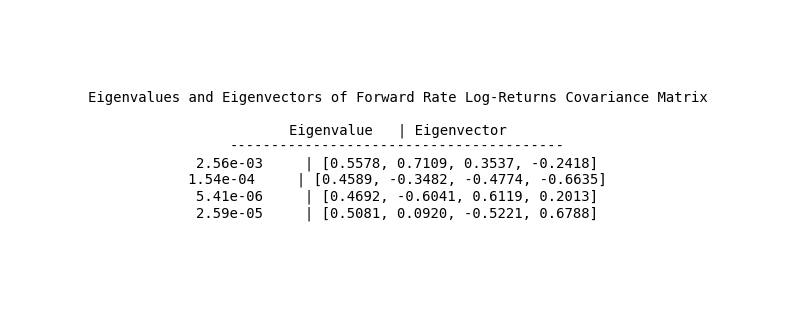

In [18]:

import matplotlib.pyplot as plt

# Eigenvalues and eigenvectors for Forward Rate Log-Returns Covariance Matrix
eigenvalues_forward = [2.56128181e-03, 1.53737508e-04, 5.41462851e-06, 2.59292784e-05]
eigenvectors_forward = [
    [0.5578,  0.7109,  0.3537, -0.2418],
    [0.4589, -0.3482, -0.4774, -0.6635],
    [0.4692, -0.6041,  0.6119,  0.2013],
    [0.5081,  0.0920, -0.5221,  0.6788]
]

# Prepare text for display
text_forward = "Eigenvalues and Eigenvectors of Forward Rate Log-Returns Covariance Matrix\n\n"
text_forward += f"{'Eigenvalue':<12} | Eigenvector\n"
text_forward += "-" * 40 + "\n"

for i in range(len(eigenvalues_forward)):
    eigenval = f"{eigenvalues_forward[i]:.2e}"
    eigenvec = ", ".join([f"{v:.4f}" for v in eigenvectors_forward[i]])
    text_forward += f"{eigenval:<12} | [{eigenvec}]\n"

# Create the figure
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")

# Display the text
ax.text(0.5, 0.5, text_forward, fontsize=10, ha="center", va="center", family="monospace")


plt.show()


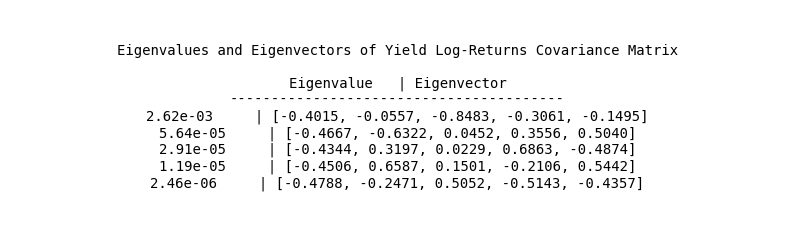

In [20]:
import matplotlib.pyplot as plt

# Eigenvalues and eigenvectors data
eigenvalues = [2.61520609e-03, 5.64016086e-05, 2.91307032e-05, 1.18508493e-05, 2.46479859e-06]
eigenvectors = [
    [-0.4015, -0.0557, -0.8483, -0.3061, -0.1495],
    [-0.4667, -0.6322,  0.0452,  0.3556,  0.5040],
    [-0.4344,  0.3197,  0.0229,  0.6863, -0.4874],
    [-0.4506,  0.6587,  0.1501, -0.2106,  0.5442],
    [-0.4788, -0.2471,  0.5052, -0.5143, -0.4357]
]

# Prepare text for display
text = "Eigenvalues and Eigenvectors of Yield Log-Returns Covariance Matrix\n\n"
text += f"{'Eigenvalue':<12} | Eigenvector\n"
text += "-" * 40 + "\n"

for i in range(len(eigenvalues)):
    eigenval = f"{eigenvalues[i]:.2e}"
    eigenvec = ", ".join([f"{v:.4f}" for v in eigenvectors[i]])
    text += f"{eigenval:<12} | [{eigenvec}]\n"

# Create the figure
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis("off")

# Display the text
ax.text(0.5, 0.5, text, fontsize=10, ha="center", va="center", family="monospace")


plt.show()
